# Functions Cell

In [1]:
def outlier_detector_zscore(df, column_name):
    """
    a function to detect outliers using z-score method
    inputs:
        df(DataFrame): the dataframe contains the whole data
        column_name(str): the column we want to find outliers from its values
    returns:
        a bool series True if outlier and False if not
    """
    upper_limit = df[column_name].mean() + 3 * df[column_name].std()
    lower_limit = df[column_name].mean() - 3 * df[column_name].std() 
    bool_series = (df[column_name] > upper_limit) | (df[column_name] < lower_limit)
    return   bool_series

In [2]:
import re
import numpy as np 

def outlier_detector(df, column_name, extreme):
    """
    a function to detecct the outliers exists in a given data
    inputs: 
        df(DataFrame): the dataframe contains the whole data
        column_name(str): the column we want to find outliers from its values
        extreme(bool): to decide to return extreme outliers or not, true for extremes false for not
    returns:
        a bool series True if outlier and False if not
    """
    if extreme:
        IQR_coef = 3
    else: 
        IQR_coef = 1.5

    quartile_1st = df[column_name].quantile(0.25)
    quartile_3rd = df[column_name].quantile(0.75)
    IQR = quartile_3rd - quartile_1st
    lower_limit = quartile_1st - IQR * IQR_coef
    upper_limit = quartile_3rd + IQR * IQR_coef
    #check if the value lies outside the lower and upper bounds then set it to True otherwise set it to False
    bool_series = (df[column_name] < lower_limit) | (df[column_name] > upper_limit) 
    return bool_series
        

In [178]:
def get_model_scores(models, transformed_X, y):
    """
    a function to go over allmodels and get a list of scores for each 
    model using cross_val_score method 
    returns: 
        models_scores a dictionary contains the scores list for each model
      
    """ 
    # go over all models
    for model_id in models: 
        # check if polynomial to get polynomial data
        if models[model_id].get("degree"): 
            print("degree")
            #get degree of the given model
            degree = models[model_id]["degree"] 
            poly = PolynomialFeatures(degree)
            #get polynomial data  
            transformed_X = poly.fit_transform(transformed_X) 
        
        scores = cross_val_score(models[model_id]['model'], transformed_X, y)
        #models[model_id]['model'].fit(X_train, y_train)
        models[model_id]['scores_list'] = scores 
        models[model_id]['score_mean'] = np.mean(scores)
        
    # return the new dictionary
    return models

In [3]:
def previous_owners(text):
    """
    function to get number of previous owner as type of float instead of the available text for 
    each car
    input:
        text (str): value of the cell to be converted to a number based on the 
    output:
        value (float):  [0-10] if the text exists in one of the given patterns
    
    """
    try:
        value = int(text)
        return value 
    except ValueError:
        if text is np.nan:
            return text
        elif re.search(r'أول|اول|۱|1|واحد', text):
            return 1 
        elif re.search(r'ثاني|تاني|۲|2', text):
            return 2 
        elif re.search(r'ثالث|تالت|ثلاث|تلاث|3|۳', text):
            return int(3)
        elif re.search(r'رابع|اربع|4|٤', text):
            return 4 
        elif re.search(r'خامس|خمس|٥|5', text):
            return 5 
        elif re.search(r'سادس|ستة|٦|6', text):
            return 6 
        elif re.search(r'سابع|سبع|۷|7', text):
            return 7 
        elif re.search(r'ثامن|تامن|ثمن|تمن|۸|8', text):
            return 8 
        elif re.search(r'تاسع|تسع|۹|9', text):
            return 9 
        elif re.search(r'عشر|عاشر|۱۰|10', text):
            return 10 
        elif re.search(r'ستيراد|مستورد|جديد|صفر|غير|شرك|Zero|0|۰|مش|لا', text):
            return 0  
        else:
            return np.nan

In [4]:

def convert_text_to_number(text):
    """
    function that handle inconsistant data in 'عداد السيارة' column and convert text to float 
    type 
    input:      
        text (str): value of cell 
    output: 
        value (float): nan if the text is meaningless and a valid number 
    """
    try:
        value = float(text)
        return value
    except ValueError:
        if re.search(r'ألف|الف|الاف', text):
            numbers = re.findall(r'\d+', text)
            if len(numbers) == 0:
                return 1000
            else:
                value = re.findall(r'\d+', text)[0]
                value = float(value) * 1000
                return value

        elif re.search(r'كيلو|كم|km|KM|Km|kM|فقط|زياد', text):
            numbers = re.findall(r'\d+', text)
            if len(numbers) == 0: 
                return 0
            else:
                value = float(numbers[0])
            return value
        else: 
            return np.nan  

In [5]:
def passengers_number(value):
    """
    function that convert the text in form '1 + 1' to a numaric value which will be valid
    to pass in the model
    input:      
        text (str): value of cell which represent the passegers number in a particular car
    output: 
        value (int): 
    """
    try:
        if(value == '1 '): 
            return 1
        elif(value == 'اكثر من 10 '): 
            return 11 
        else: 
            numbers_list = value.split('+') 
            return int(numbers_list[0]) + int(numbers_list[1])
    except:
        try:
            value = int(value)
            return value
        except:
            return np.nan

In [6]:
def normalize_features(data, column_names, normalizer):
    # compute mean and standard deviation
    normalizer.fit(data[column_names])
    # normalize the data
    normalized_data = normalizer.transform(data[column_names])
    # save data back to the data frame
    data[column_names] = normalized_data
    
    return data

### Importing packages and reading data

In [117]:
#importing libraries 
import warnings    
warnings.simplefilter("ignore", UserWarning)
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
# from sklearn.preprocessing import StandardScaler, MinMaxScaler  
from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn import tree 
import seaborn as sns
from sklearn.impute import KNNImputer
import re
from sklearn.tree import DecisionTreeRegressor
from scipy import stats 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
import pickle

In [118]:
#reading data
data = pd.read_csv('../data/cars_data.csv')

In [119]:
data.head()

,السعر,الموديل,موديل سنة,لون السيارة,قوة الماتور,عدد الركاب,عداد السيارة,أصحاب سابقون,أصل السيارة,رخصة السيارة,...,الزجاج,سعر التأمين,وسادة حماية هوائية,فرش جلد,جنطات مغنيسيوم,فتحة سقف,مسجل CD,إغلاق مركزي,مُكيّف,جهاز إنذار
0,100000.0,كيا اوبتيما,2014,أبيض عاجي,2000.0,4+1,75000,يد اولى,خصوصي,فلسطينية,...,الكتروني,3090,1,1,1,1,1,1,1,1
1,60000.0,كيا سورينتو,2007,سكني,2500.0,7+1,130000,2,خصوصي,فلسطينية,...,الكتروني,2740,1,1,1,1,1,1,1,1
2,43500.0,هونداي افانتي,2006,سكني,1600.0,NaN,NaN,NaN,خصوصي,فلسطينية,...,الكتروني,2340,1,1,1,0,1,1,1,1
3,5500.0,فيات 127,1982,بيج,906.0,4+1,شغال,00,خصوصي,فلسطينية,...,يدوي,967,0,0,0,0,1,0,1,0
4,54000.0,بيجو 208,2014,فضي,1200.0,4+1,38000,NaN,خصوصي,فلسطينية,...,الكتروني,2035,1,0,1,0,0,1,1,1


In [120]:
#get the shape of the data
data.shape

(6864, 22)

there are 6864 samples and 22 features

In [121]:
#check the data type for each feature 
data.dtypes

السعر                 float64
الموديل                object
موديل سنة               int64
لون السيارة            object
قوة الماتور           float64
عدد الركاب             object
عداد السيارة           object
أصحاب سابقون           object
أصل السيارة            object
رخصة السيارة           object
نوع الوقود             object
نوع الجير              object
الزجاج                 object
سعر التأمين             int64
وسادة حماية هوائية      int64
فرش جلد                 int64
جنطات مغنيسيوم          int64
فتحة سقف                int64
مسجل CD                 int64
إغلاق مركزي             int64
مُكيّف                  int64
جهاز إنذار              int64
dtype: object

- There are 7 numeric features but some of them are of type object such as 'عدد الركاب', So I'll turn them into numeric.
- There are 15 categorical feature


# Features Preprocessing

In [122]:
#Since the insurance depends on the target variable, I should not use it in prediction 
data.drop(columns = ['سعر التأمين'], inplace = True)
data.head()

,السعر,الموديل,موديل سنة,لون السيارة,قوة الماتور,عدد الركاب,عداد السيارة,أصحاب سابقون,أصل السيارة,رخصة السيارة,...,نوع الجير,الزجاج,وسادة حماية هوائية,فرش جلد,جنطات مغنيسيوم,فتحة سقف,مسجل CD,إغلاق مركزي,مُكيّف,جهاز إنذار
0,100000.0,كيا اوبتيما,2014,أبيض عاجي,2000.0,4+1,75000,يد اولى,خصوصي,فلسطينية,...,اوتوماتيك,الكتروني,1,1,1,1,1,1,1,1
1,60000.0,كيا سورينتو,2007,سكني,2500.0,7+1,130000,2,خصوصي,فلسطينية,...,نصف اوتوماتيك,الكتروني,1,1,1,1,1,1,1,1
2,43500.0,هونداي افانتي,2006,سكني,1600.0,NaN,NaN,NaN,خصوصي,فلسطينية,...,اوتوماتيك,الكتروني,1,1,1,0,1,1,1,1
3,5500.0,فيات 127,1982,بيج,906.0,4+1,شغال,00,خصوصي,فلسطينية,...,عادي,يدوي,0,0,0,0,1,0,1,0
4,54000.0,بيجو 208,2014,فضي,1200.0,4+1,38000,NaN,خصوصي,فلسطينية,...,اوتوماتيك,الكتروني,1,0,1,0,0,1,1,1


#### Get a closer look to numeric data that have object type

- عدد الركاب

In [123]:
#check the unique values in 'عدد الركاب' feature 
data['عدد الركاب'].unique()

array(['4+1 ', '7+1 ', nan, '4+1  ', '5+1 ', '٤+١ ', '8 ', '6+1 ', '4+١ ',
       '٧ ', '7,+ 1 ', '7:1 ', '1+7 ', '١+٤ ', '2+1 ', '6+١ ', '+1 ',
       '6±١ ', '22 ', '1+1 ', '٥+١ ', '٧+1 ', '5+2 ', 'مثال: 4 + 1 ',
       '7.1 ', '7 =1 ', '٧+١ ', '1+2 ', '6x1     ', '1+٤ ', '4+1   ',
       '2/1 ', '8+1 ', '٨+١ ', '٦+١ ', '2 ', '4+2 ', '1٠4 ', '4\\١ ',
       '000 ', '3+1 ', '1 ', 'اكثر من 10 ', '9+1 '], dtype=object)

As shown in the previous cell passengers number presented as a string so I'll use passengers_number function to convert them to numeric data

In [124]:
#convert the equation to valid number 
data['عدد الركاب'] = data['عدد الركاب'].map(passengers_number)

In [125]:
#check the type
data['عدد الركاب'].dtypes

dtype('float64')

In [126]:
#another check the unique values
data['عدد الركاب'].unique() 

array([  5.,   8.,  nan,   6.,   7.,   3.,   1.,  22.,   2.,   9., 104.,
         0.,   4.,  11.,  10.])

It seems there are some noise data, I'll handle them in data cleaning 

- عداد السيارة

In [127]:
#convert values to float using convert_text_to_number function
data['عداد السيارة'] = data['عداد السيارة'].map(convert_text_to_number)

In [128]:
#check the type
data['عداد السيارة'].dtypes

dtype('float64')

- أصحاب سابقون

In [129]:
#check for unique values to figure out data pattern
data['أصحاب سابقون'].unique()

array(['يد اولى ', '2 ', nan, '00  ', '0 ', '1 ', 'يد ثانية ', '4 ',
       'يد ثانيه ', '3 ', 'ثالثة ', 'غير منمر استيراد الماني ', '00 ',
       'غير منمرة ', 'أولى ', '٨ ', 'يد اولا ', 'يد ثالثة ', 'يد ثالثة  ',
       'ثانية ', 'يد أولى ', 'يد سادسة ', '5 ', 'اولى  ', 'صفر ', '9 ',
       '0000 ', 'رابعه ', 'يد أولى  ', '٤ ', 'يد رابعة  ', '٢ ',
       'يد ثالثه ', '6 ', 'يد اولى  ', '7 ', '... ', 'يد ثانيه  ',
       'يد أولى استيراد ', 'يد اولي 1 ', 'اولى ', '...... ', 'ثانيه ',
       'واحد ', 'اربعة ', 'اولا ', '٣ ', 'غير منمره ', 'يد تالته ', '٦ ',
       'يد رابعه ', 'يد ثالثة ( فتيات) ', '159000 ', '12 ', '- ',
       'مش منمر ', '0 مستورده ', 'يد تانيه ', '10 ', 'يد 1 ', 'مستورد ',
       'يد 4 ', 'يد رابعة ', '00000 ', '١ ', 'استيراد مباشر من كوريا  ',
       'يد خامسة ', '٥ ', 'يد 5 ', '******** ', 'نعم ', 'مش منمرة  ',
       'يد 3 ', ' يد ثانيه ', 'يداولى ', '4  ', 'يد أولى وكالة ',
       'يد خامسه ', 'يد ثانية  ', '٩ ', '٧ ', 'يدو اولى ', 'للبيع  ',
       '8 ', 'يد و

In [130]:
#using previous_owners function to convert the text into float value
data['أصحاب سابقون'] = data['أصحاب سابقون'].map(previous_owners)

In [131]:
#check the type
data['أصحاب سابقون'].dtypes

dtype('float64')

# DAta Cleaning

#### Handling Missing Data

In [132]:
#check missing data percentage for each column
missing_per = data.isna().sum() / data.shape[0]
#Get only columns have missing values
missing_per = missing_per[missing_per > 0]
missing_per

عدد الركاب      0.114510
عداد السيارة    0.293561
أصحاب سابقون    0.252477
dtype: float64

I'll fill the missing values for each column according to it's data

- عداد السيارة

get a closer look on the data to decide the method I wanna use to fill the missings

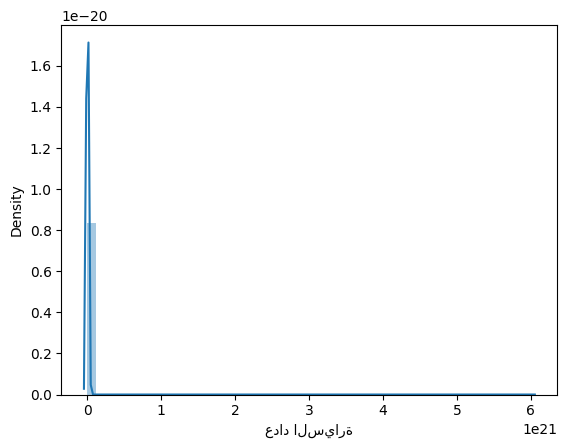

In [133]:
#plot the distribution 
sns.distplot(data['عداد السيارة']) 
plt.xlabel('عداد السيارة') 
plt.show()    

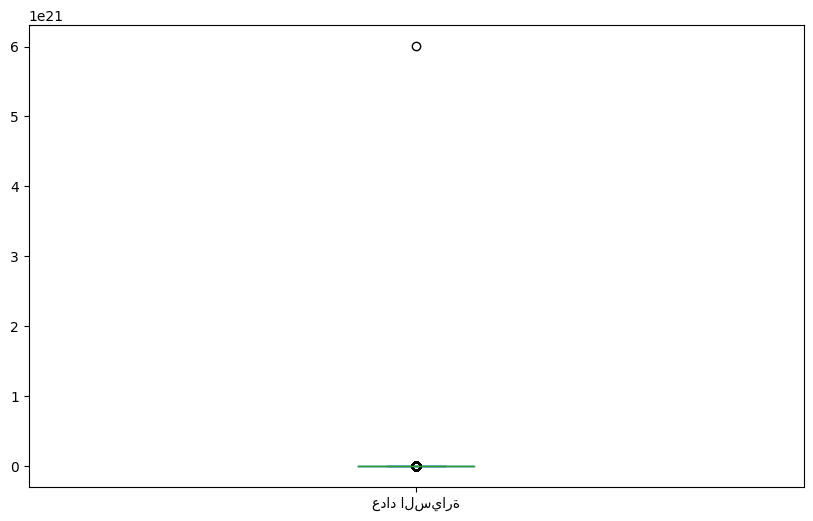

In [134]:
#plot the boxplot 
data['عداد السيارة'].plot.box(figsize = (10,6)) 
plt.show()

There's an extrem outlier that I want to remove

In [135]:
#remove extreme outlier in عداد السيارة feature from the dataset
data = data[~outlier_detector(data, 'عداد السيارة', 1)]  

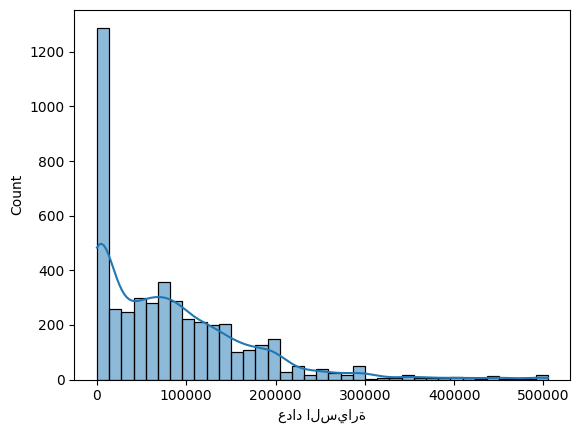

In [136]:
#plot the distribution 
sns.histplot(data['عداد السيارة'], kde=True)
plt.xlabel('عداد السيارة') 
plt.show()

Since this data still skewed, I will fill the missing values using the median, then deal with this skewness using log transformation in feature engineering section

In [137]:
#get the median to use it in filling the missing value
km_counter_median = data['عداد السيارة'].median()
data['عداد السيارة'].fillna(value = km_counter_median, inplace=True)

In [138]:
#make sure the feature doesn't has missing values anymore
data['عداد السيارة'].isna().sum()

0

- عدد الركاب

I'll fill missings using knn imputer based on the car model

In [139]:
#define labelencoder object to encode cars model 
le = LabelEncoder() 

In [140]:
#encode model name
model_encoded = le.fit_transform(data['الموديل'])
#convert labels array to a df so I can pass it with the passengers number
model_encoded = pd.DataFrame(model_encoded, columns = ['الموديل'])
#add passengers number column to model_encoded df
model_encoded  = pd.concat([model_encoded, data[['عدد الركاب']]], axis = 1)
#define a knn imputer object to use in filling missing passengers number according 
#to the nearest neighbours based on car model
imputer = KNNImputer(n_neighbors = 1)
#convert the array to a df after imputing the missing values
clean_df = pd.DataFrame(imputer.fit_transform(model_encoded), columns = model_encoded.columns)

In [141]:
#fill missings in the original df(data)
data['عدد الركاب'] = clean_df['عدد الركاب'].astype(int)

In [142]:
#check if the feature still has missing values
data['عدد الركاب'].isna().sum()

3

since the number of missing values is insegnificant, So I'll drop them

In [143]:
data = data[~data['عدد الركاب'].isna()]         

In [144]:
#check if the feature still has missing values
data['عدد الركاب'].isna().sum()

0

- أصحاب سابقون

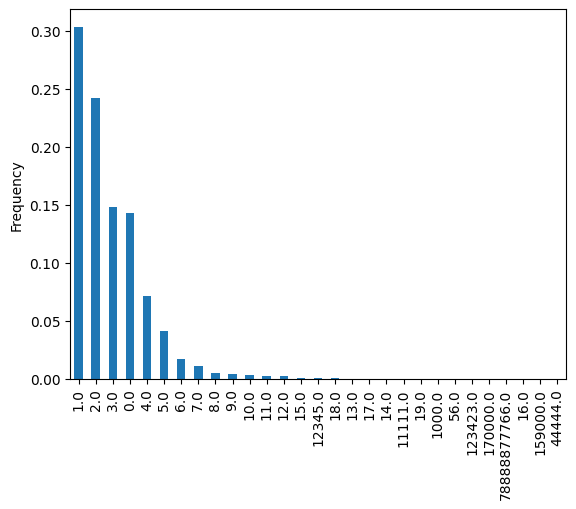

In [145]:
#plot the bar chart to check unique values and thier frequencies
data['أصحاب سابقون'].value_counts(normalize=True).plot.bar()
plt.ylabel("Frequency")
plt.show()

from the chart above, there are some noisy that I'll drop

In [146]:
#drop observations have value of 'أصحاب سابقون' more than 10
data = data[(data['أصحاب سابقون'] <= 10) | (data['أصحاب سابقون'].isna())]

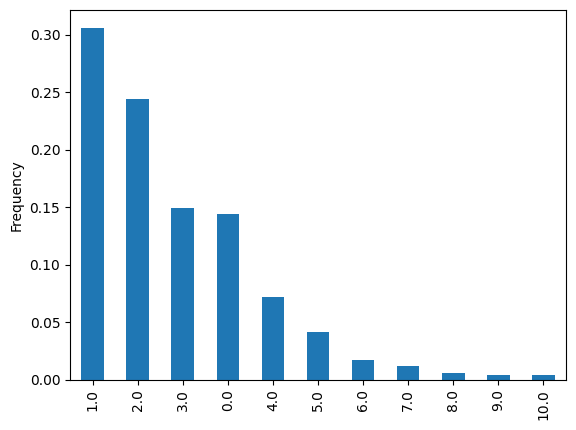

In [147]:
#plot the bar chart to check unique values and thier frequencies
data['أصحاب سابقون'].value_counts(normalize=True).plot.bar()
plt.ylabel("Frequency")
plt.show()

In [148]:
#get the median for this feature
previous_owners_mode = data['أصحاب سابقون'].median()
#fill the missing values using by median
data['أصحاب سابقون'].fillna(value = previous_owners_mode, inplace=True)

In [149]:
data['أصحاب سابقون'].isna().sum()

0

In [150]:
#check is there is a missing value in the dataframe
data.isna().sum().sum() 

0

# EDA

### Numeric Features

##### Motor Power

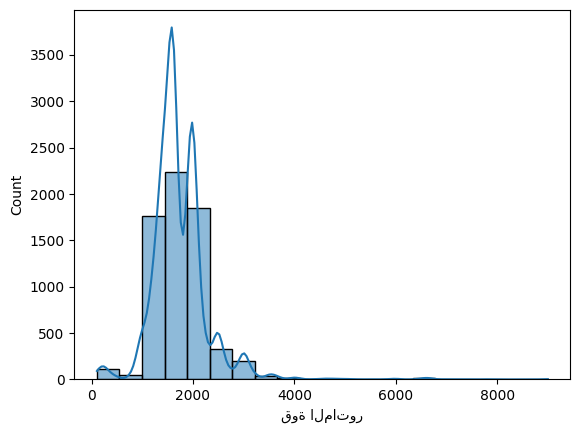

In [151]:
#plot the distribution
sns.histplot(data['قوة الماتور'], bins = 20, kde=True)
plt.xlabel('قوة الماتور') 
plt.show()

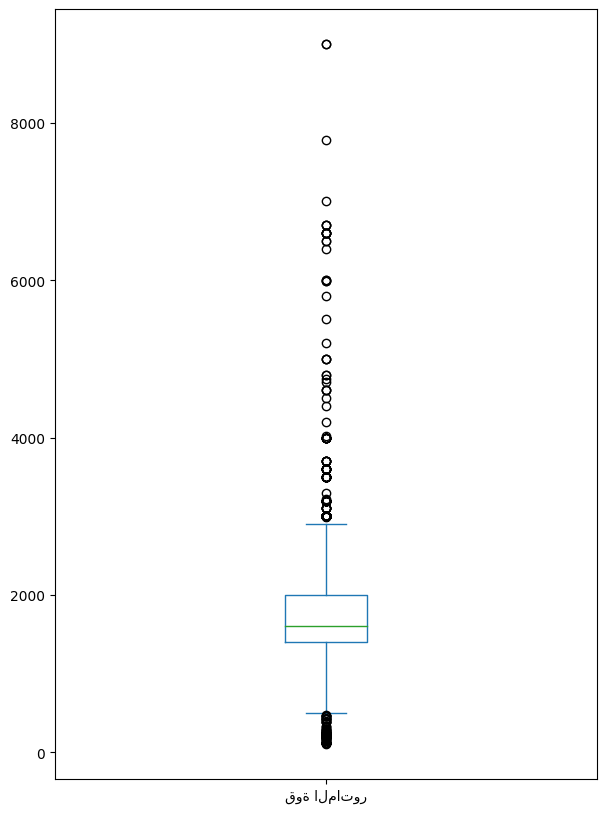

In [152]:
#plot the boxplot 
data['قوة الماتور'].plot.box(figsize = (7,10)) 
plt.show()

the distributin is kind of similler to the normal. from the boxplot there are outliers So I'll remove the extreme ones

In [153]:
data = data[~outlier_detector(data, 'قوة الماتور', 1)] 

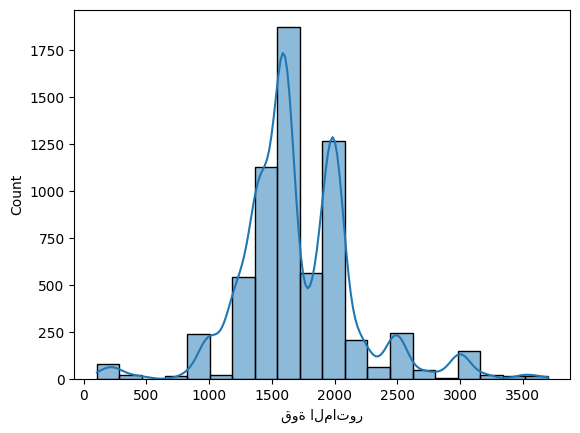

In [154]:
#plot the distribution aftter removing extreme outlier
sns.histplot(data['قوة الماتور'], bins = 20, kde=True)
plt.xlabel('قوة الماتور') 
plt.show()

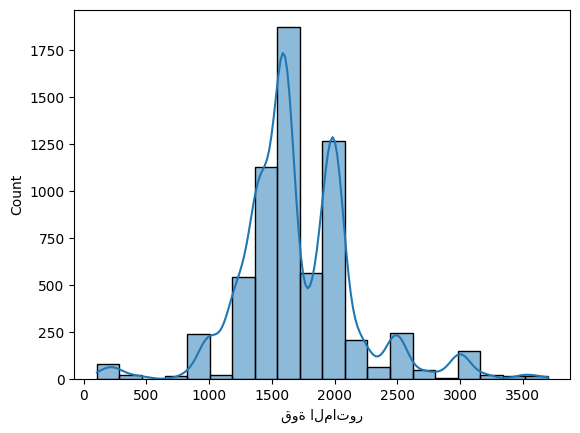

In [155]:
#plot the distribution aftter removing extreme outlier
sns.histplot(data['قوة الماتور'], bins = 20, kde=True)
plt.xlabel('قوة الماتور') 
plt.show()

- موديل سنة

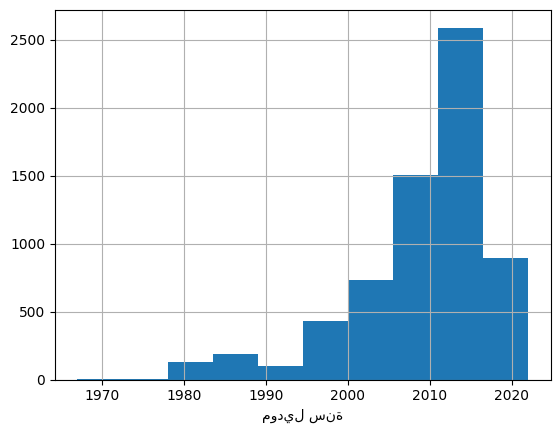

In [156]:
#plot the histogram
data['موديل سنة'].hist()
plt.xlabel('موديل سنة') 
plt.show()

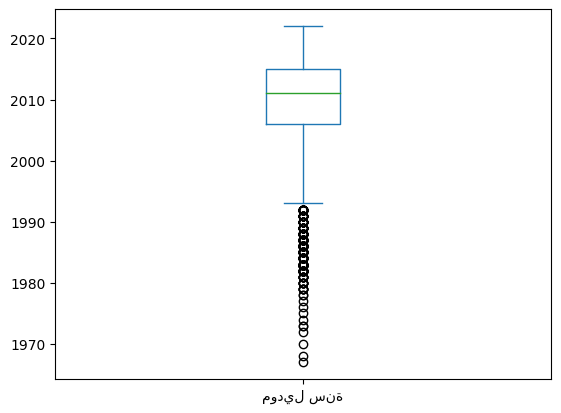

In [157]:
#plot the histogram
data['موديل سنة'].plot.box() 
plt.show()

the distribution is very skewed to the left, I'll remove the extreme outliers only

In [158]:
data = data[~outlier_detector(data, 'موديل سنة', 1)]

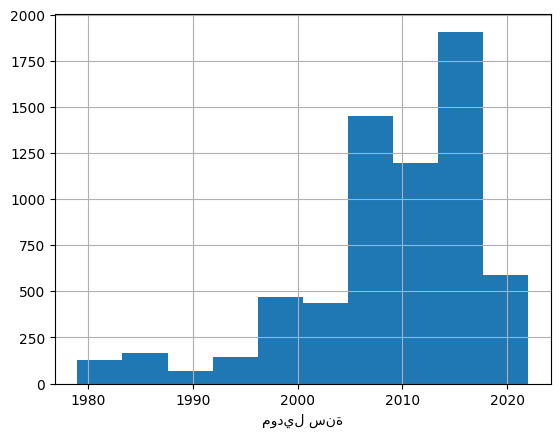

In [159]:
#plot the histogram
data['موديل سنة'].hist()
plt.xlabel('موديل سنة') 
plt.show()

It is still skewed, but it's fine it will be transformed using log transformer so it will reduce the skewness

- السعر

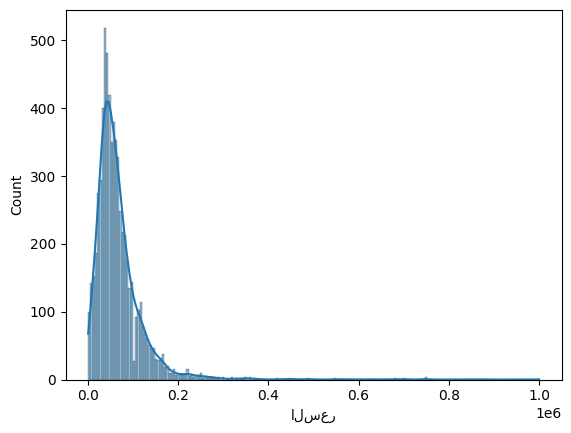

In [160]:
#plot the distribution
sns.histplot(data['السعر'], kde = True)
plt.xlabel('السعر') 
plt.show()

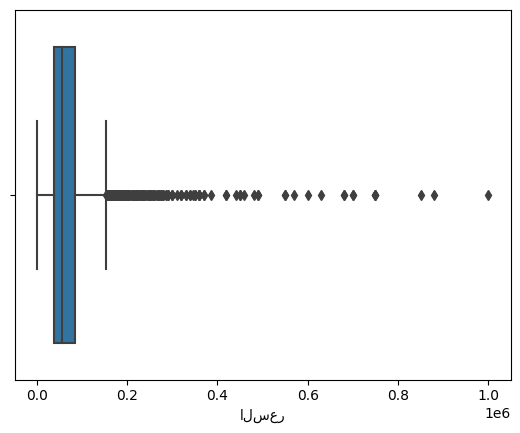

In [161]:
sns.boxplot(data = data, x = 'السعر' )
plt.xlabel('السعر') 
plt.show() 

There are significant outliers which I think is an unlogical values So I'll drop them

In [162]:
data = data[~outlier_detector(data, 'السعر', 1)]

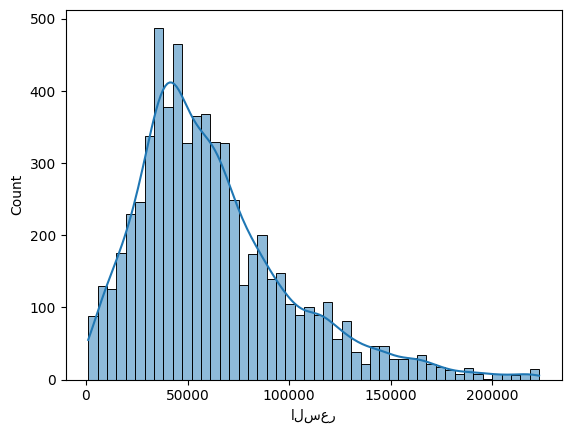

In [163]:
#plot the distribution after dropping the extreme outliers
sns.histplot(data['السعر'], kde = True) 
plt.xlabel('السعر') 
plt.show()

This looks much better

- عدد الركاب

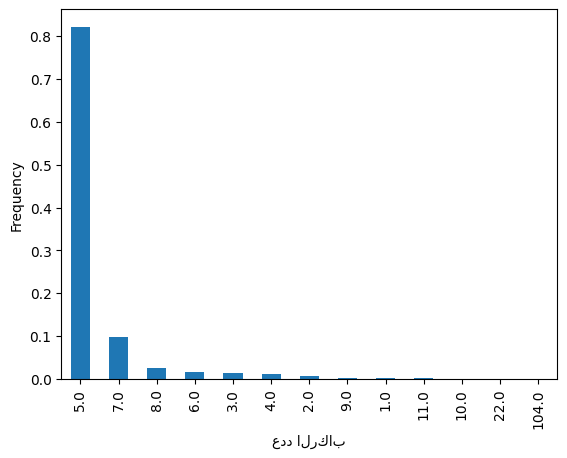

In [164]:
#bar plot for passengers number feature, to check values and thier frequency
data['عدد الركاب'].value_counts(normalize = True).plot.bar()
plt.xlabel('عدد الركاب')
plt.ylabel('Frequency')
plt.show()

as shown in the plot there are noisy data (104, 0) which I will remove from the dataset

In [165]:
data = data[~outlier_detector_zscore(data, 'عدد الركاب')]

#### Categorical Features 

In [166]:
#get categorical features name
categorical_features = [col for col in data.columns if data[col].dtypes == 'O']
categorical_features

['الموديل',
 'لون السيارة',
 'أصل السيارة',
 'رخصة السيارة',
 'نوع الوقود',
 'نوع الجير',
 'الزجاج']

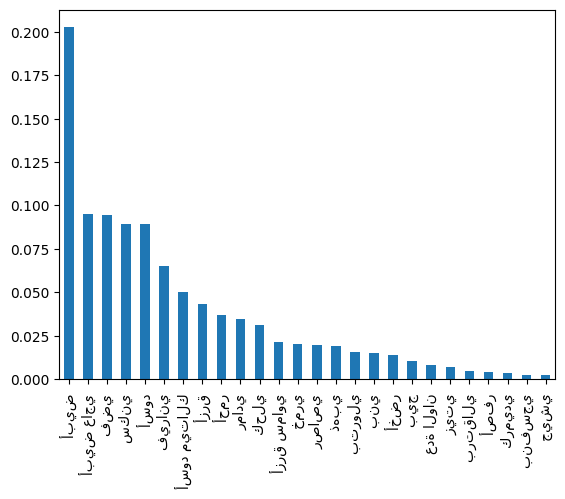

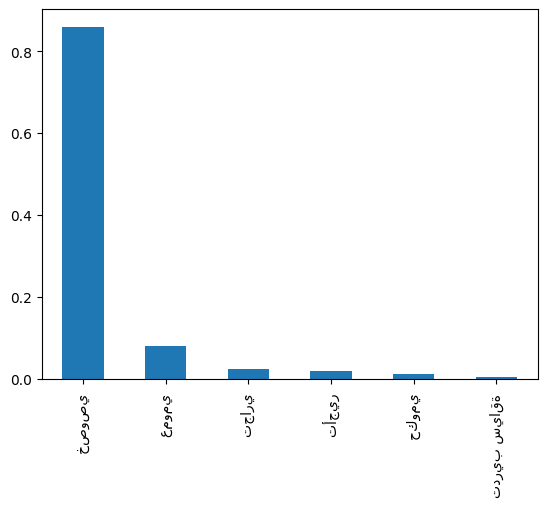

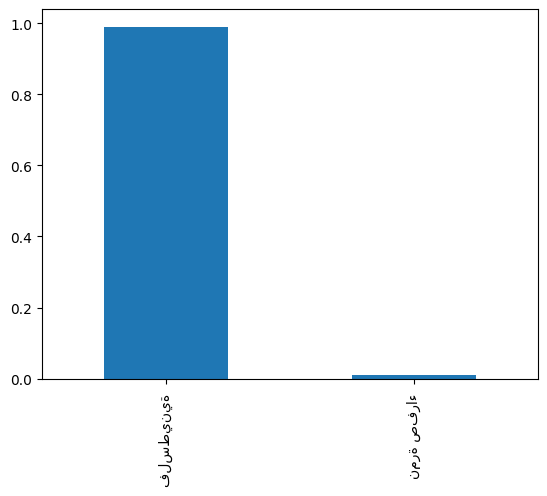

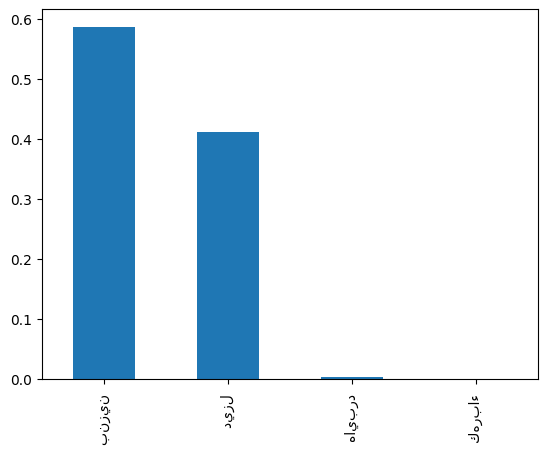

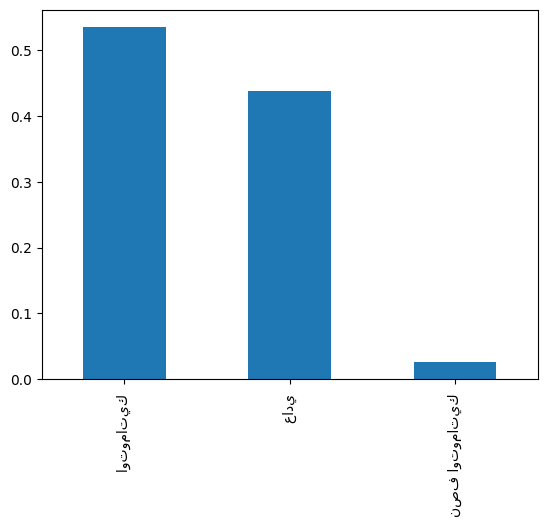

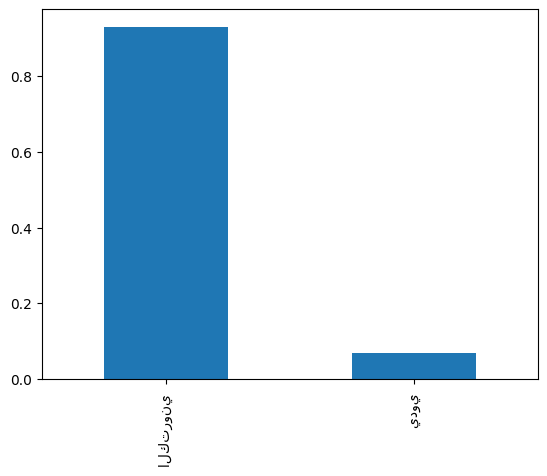

In [167]:
#Plot bar plot for each categorical feature
for feature in categorical_features:
    if feature == 'الموديل':
        continue
    else:   
        data[feature].value_counts(normalize=True).plot.bar()
        plt.show()

In [168]:
data['نوع الجير'].unique()

array(['اوتوماتيك ', 'نصف اوتوماتيك ', 'عادي '], dtype=object)

In [169]:
data['نوع الوقود'].unique()

array(['بنزين ', 'ديزل ', 'هايبرد ', 'كهرباء '], dtype=object)

In [170]:
additions = [
        'مُكيّف', 
        'إغلاق مركزي', 
        'جهاز إنذار', 
        'مسجل CD', 
        'فتحة سقف', 
        'جنطات مغنيسيوم', 
        'فرش جلد', 
        'وسادة حماية هوائية' 
        ]

In [ ]:
#
data[additions].apply(pd.Series.value_counts) 

# Feature Engineering

- Dealing with skewed features
- Encode categorical features
- Scale the numeric features 


#### Encoding categorical Variables
all the categories available in the dataset are of type `Nominal`

In [171]:
#get numeric features name
numeric_features = [
                'عدد الركاب', 
                'قوة الماتور', 
                'موديل سنة', 
                'أصحاب سابقون', 
                'عداد السيارة'
                ]

In [172]:
#OneHotEncoder object to encode the categorical variables
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
#log transformer for numeric data using np.log1p to avoid -inf for zeros 
#so the equation will be log(x + 1)
log_transformer  = FunctionTransformer(np.log1p) 

In [173]:
#define transformer to selectively apply data preparation transforms
transformer = ColumnTransformer( 
    transformers = [
        #apply OneHotEncoder to categorical features
        ('categorical', ohe, categorical_features),
        #apply StandardScaler to numeric features
        ('numerical', log_transformer, numeric_features),
    ],
    #unspecified columns will be passed through without transformation  
    remainder='passthrough',
    #prevent adding prefix to columns names
    verbose_feature_names_out = False 
)

In [174]:
X = data.drop(columns = 'السعر')
y = data['السعر'] 

In [175]:
#transform the data(without the target variable) 
transformed_X = transformer.fit_transform(X)

# Model Selection

Try polynomial regression, kNN, and decision tree to select the best model to predict car price 

- `KNN`

Search for an optimal value of K for KNN

In [176]:
# range of k we want to try
k_range = range(1, 31)
# empty dictionary to store k with it's score 
k_scores = {}
# 1. loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsRegressor with k neighbours
    knn = KNeighborsRegressor(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsRegressor with k neighbours
    scores = cross_val_score(knn, transformed_X, y)
    # 4. store mean of scores for k neighbors to k_scores dictionary 
    k_scores[str(k)] = scores.mean().round(2)

In [177]:
# get the optimal k (k maximum score)
optimal_k = max(k_scores, key = k_scores.get)  
print("optimal value of k is ", optimal_k)

optimal value of k is  9


In [180]:
#define models dictionary which contains models I want to try 
#with thier description, hyperparameters, and the score after evaluating the model
models = {
    "KNN": {
        "model": KNeighborsRegressor(n_neighbors = int(optimal_k)), 
        "description":"KNN Regressor",
        "K": int(optimal_k),  
        },   
    "DecisionTreeRegressor" : {  
        "model": DecisionTreeRegressor(),
        "description": "Decision Tree Regressor" 
        },
    "ols": {
        "model": LinearRegression(),
        "description":"orinary least square"
        }, 
    "sgd1": {
        "model": SGDRegressor(),
        "description":"gradient descent with degree 1"
        },  
    "poly2_lasso": {
        "model": Lasso(), 
        "degree" : 2,
        "description":"orinary least square"
        },  
    # "poly2": {
    #     "model": LinearRegression(), 
    #     "degree": 2,
    #     "description":"Polynomial of degree 2"
    #     }, 
    # "poly2_ridge": {
    #     "model": Ridge(), "degree" : 2,
    #     "description":"orinary least square"
    #     },   
    }

In [181]:
#train models and get the score for each one
models = get_model_scores(models, transformed_X, y)

degree


In [182]:
models

{'KNN': {'model': KNeighborsRegressor(n_neighbors=9),
  'description': 'KNN Regressor',
  'K': 9,
  'scores_list': array([0.57721361, 0.49016709, 0.47240443, 0.54135009, 0.55050326]),
  'score_mean': 0.5263276976574237},
 'DecisionTreeRegressor': {'model': DecisionTreeRegressor(),
  'description': 'Decision Tree Regressor',
  'scores_list': array([0.54804847, 0.67775327, 0.58553857, 0.68116249, 0.73948871]),
  'score_mean': 0.6463983011092546},
 'ols': {'model': LinearRegression(),
  'description': 'orinary least square',
  'scores_list': array([-1.41827845e+18, -1.89122681e+18, -5.35281508e+18, -8.76163913e+19,
         -1.25454480e+21]),
  'score_mean': -2.7016470315513577e+20},
 'sgd1': {'model': SGDRegressor(),
  'description': 'gradient descent with degree 1',
  'scores_list': array([0.59516241, 0.4470111 , 0.50048765, 0.5661522 , 0.50115749]),
  'score_mean': 0.5219941679816815},
 'poly2_lasso': {'model': Lasso(),
  'degree': 2,
  'description': 'orinary least square',
  'scores_

In [192]:
#get each model with it's score
for model_id in models: 
    print(model_id)
    print(models[model_id]["score_mean"])
    print("--------------------------")

KNN
0.5263276976574237
--------------------------
DecisionTreeRegressor
0.6463983011092546
--------------------------
ols
-2.7016470315513577e+20
--------------------------
sgd1
0.5219941679816815
--------------------------
poly2_lasso
0.6611242943659412
--------------------------


The best score is from  <b>Polynomial Regression with degree of 2</b>

## Pickling

In [86]:
# Decision Regressor Pipeline
tree_pip = Pipeline( 
    steps = [
        ("transformer", transformer),
        ("DecisionTreeRegressor", DecisionTreeRegressor())
    ]
)

In [87]:
#slice the target variable and the other features
X_pip = data.drop(columns = ['السعر'])
y_pip = data['السعر']

In [88]:
#fit data
tree_pip.fit(X_pip, y_pip) 

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['الموديل', 'لون السيارة',
                                                   'أصل السيارة',
                                                   'رخصة السيارة', 'نوع الوقود',
                                                   'نوع الجير', 'الزجاج']),
                                                 ('numerical',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['عدد الركاب', 'قوة الماتور',
                                                   'موديل سنة', 'أصحاب سابقون',
                                                   'عداد السيارة'])],
                                   verbose_feature_names_out=False)),
                ('DecisionTreeRegressor', DecisionTreeRegressor())])

In [89]:
# export tree_pip 
tree_regressor_model_file_name = "../Models/Decision Tree Regressor.pkl"
pickle.dump(tree_pip, open(tree_regressor_model_file_name, 'wb'))

In [91]:
poly2 = PolynomialFeatures(2)    
poly2_lasso_pipline = Pipeline(
    steps = [
        ("transformer", transformer),
        ("polynomial", poly2),
        ("DecisionTreeRegressor", Lasso())
    ]
)

In [92]:
#fit data
poly2_lasso_pipline.fit(X_pip, y_pip) 

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['الموديل', 'لون السيارة',
                                                   'أصل السيارة',
                                                   'رخصة السيارة', 'نوع الوقود',
                                                   'نوع الجير', 'الزجاج']),
                                                 ('numerical',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['عدد الركاب', 'قوة الماتور',
                                                   'موديل سنة', 'أصحاب سابقون',
                                                   'عداد السيارة'])],
                                   verbose_feature_names_out=False)),
                ('polynomial', PolynomialFeatures()),
                ('DecisionTreeRegressor', Lasso())])

In [93]:
# exporting poly2_lasso_pipline 
poly2_lasso_model_file_name = "../Models/Polynomial Degree 2 Lasso.pkl"
pickle.dump(poly2_lasso_pipline, open(poly2_lasso_model_file_name, 'wb'))

# Cross VAl End

## KNN Model

## Decision Tree Regressor

In [ ]:
#bar plot for passengers number feature, to check values and thier frequency
data['عدد الركاب'].value_counts().plot.bar()
plt.xlabel('عدد الركاب')
plt.ylabel('Frequency')     
plt.show()

as shown in the plot there are noisy data (104, 0) which I will remove from the dataset

In [ ]:
#data = data[data['عدد الركاب'] != 104]
#data = data[data['عدد الركاب'] != 0]

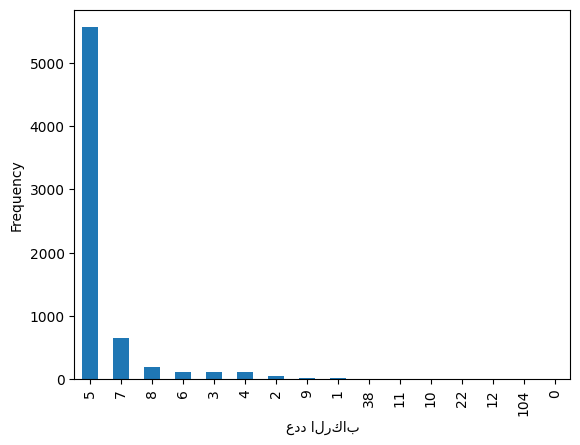

In [342]:
#bar plot for passengers number feature after droppint noisy data
data['عدد الركاب'].value_counts().plot.bar()
plt.xlabel('عدد الركاب')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#bar plot for previous owners feature to check unique 
data['أصحاب سابقون'].value_counts().plot.bar( )
plt.xlabel('أصحاب سابقون')
plt.ylabel('Frequency')
plt.show()

I'll fill the missing values in this feature using knn imputer 

In [ ]:
#define numeric_data that will be used while imputing missings
numeric_data = data.copy()
numeric_data = numeric_data[numeric_features_names]
#drop passengers number because it is unchangeable  
numeric_data.drop(columns = 'عدد الركاب', inplace = True)
numeric_data     

In [179]:
#knn imputer object to use in filling missing previous owners number according 
#to the nearest 3 neighbours             
previous_owners_imputer = KNNImputer(n_neighbors = 5)
#impute missing values
filled_array = previous_owners_imputer.fit_transform(numeric_data) 
#convert the array into a df  
numeric_data = pd.DataFrame(filled_array, columns = numeric_data.columns) 
numeric_data

,عداد السيارة,أصحاب سابقون,قوة الماتور,موديل سنة
0,75000.0,1.0,2000.0,2014.0
1,130000.0,2.0,2500.0,2007.0
2,65000.0,3.0,1600.0,2006.0
3,65000.0,0.0,906.0,1982.0
4,38000.0,0.0,1200.0,2014.0
...,...,...,...,...
6669,0.0,1.0,2000.0,2014.0
6670,0.0,1.2,1600.0,2014.0
6671,50000.0,2.6,1000.0,2018.0
6672,65000.0,4.6,1600.0,2012.0


In [180]:
#fill missings in the original df(data)
data['أصحاب سابقون'] = numeric_data['أصحاب سابقون'].astype(int)

In [181]:
data['أصحاب سابقون'].isna().sum()

183

##### Now, the data is totaly cleaned without outliers and missing data 